# Russian License Plate Blurring

In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [119]:
img = cv2.imread('car_plate.jpg')

In [120]:
def display(img):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    new_img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    ax.imshow(new_img)

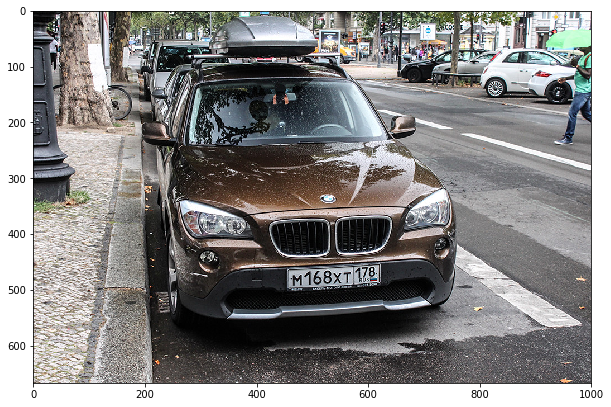

In [121]:
display(img)

In [122]:
plate_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_russian_plate_number.xml')

In [123]:
def detect_plate(img):
    plate_img = img.copy()
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3,minNeighbors=3)
    for (x,y,w,h) in plate_rects:
        cv2.rectangle(plate_img,(x,y),(x+w,y+h),(0,0,255), 4)
        return plate_img

In [124]:
result = detect_plate(img)

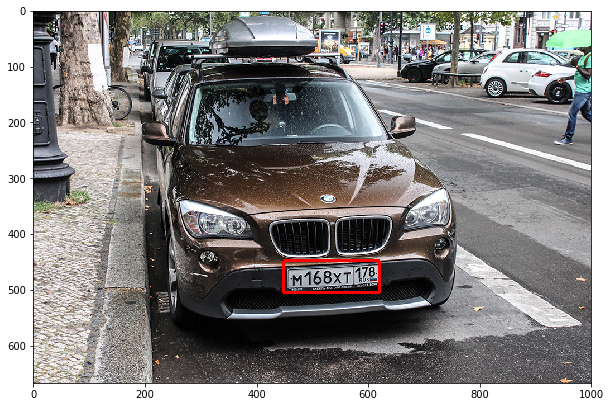

In [125]:
display(result)

In [126]:
def detect_and_blur_plate(img):
    
    
    plate_img = img.copy()
    roi = img.copy()
  
    plate_rects = plate_cascade.detectMultiScale(plate_img,scaleFactor=1.3, minNeighbors=3) 
    
    for (x,y,w,h) in plate_rects: 
        
        roi = roi[y:y+h,x:x+w]
        blurred_roi = cv2.medianBlur(roi,9)
        
        plate_img[y:y+h,x:x+w] = blurred_roi
        
    return plate_img
    

In [127]:
result = detect_and_blur_plate(img)

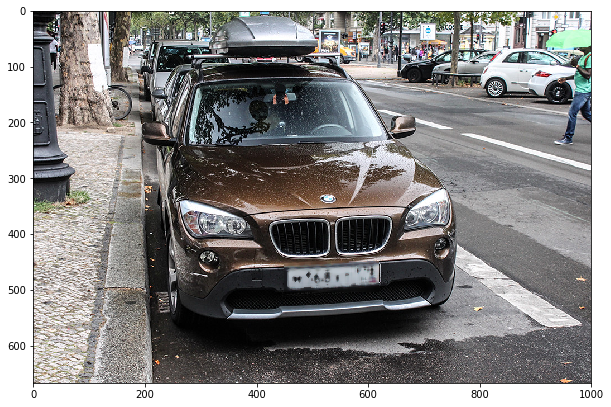

In [128]:
display(result)